<a href="https://colab.research.google.com/github/moinakgh99/SentinelNet-AI-Moinak/blob/main/SentinelNet_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  **PROJECT =** SentinelNet-AI-Powered Network Intrusion
Detection System (NIDS)


**Project Statement:** The project aims to build an AI-powered Network Intrusion Detection System (NIDS) that can automatically detect and classify network traffic as normal or malicious.
Using machine learning, the system will analyze network data, extract key features, train models, and raise alerts whenever suspicious activity or a possible cyber-attack is detected.

**Outcomes:**


*   Understand network traffic data and identify common cyberattacks.

*   Apply machine learning algorithms to detect intrusions.

*   Build and evaluate classification models such as Decision Tree, Random    Forest, and SVM.
*   Perform feature engineering and anomaly detection to improve accuracy.


*   Generate alerts or logs for detected threats.


*   Prepare a detailed report and presentation to showcase project results.




**Dataset :** CICIDS2017 Dataset: https://www.unb.ca/cic/datasets/ids-2017.html

**Dataset Choosen :** I chose the **Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv** file because it provides a focused, labeled, and realistic dataset for detecting DDoS attacks — making it an ideal choice for performing data exploration, preprocessing, and building a machine learning–based Network Intrusion Detection System.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Dataset Acquisition and Exploration**

In [ ]:
# Load and Inspect the Dataset
# to verify that the data has been imported correctly.

import pandas as pd
from pathlib import Path

file_path = "/content/drive/MyDrive/AI Sentinet Project/GeneratedLabelledFlows/TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"

# Load dataset
df = pd.read_csv(file_path, low_memory=False)

print("Dataset shape:", df.shape)   # rows x columns

# First 5 rows
print("\nFirst 5 rows:")
print(df.head())


Dataset shape: (225745, 85)

First 5 rows:
                                   Flow ID       Source IP   Source Port  \
0  192.168.10.5-104.16.207.165-54865-443-6  104.16.207.165           443   
1    192.168.10.5-104.16.28.216-55054-80-6   104.16.28.216            80   
2    192.168.10.5-104.16.28.216-55055-80-6   104.16.28.216            80   
3  192.168.10.16-104.17.241.25-46236-443-6   104.17.241.25           443   
4  192.168.10.5-104.19.196.102-54863-443-6  104.19.196.102           443   

   Destination IP   Destination Port   Protocol      Timestamp  \
0    192.168.10.5              54865          6  7/7/2017 3:30   
1    192.168.10.5              55054          6  7/7/2017 3:30   
2    192.168.10.5              55055          6  7/7/2017 3:30   
3   192.168.10.16              46236          6  7/7/2017 3:30   
4    192.168.10.5              54863          6  7/7/2017 3:30   

    Flow Duration   Total Fwd Packets   Total Backward Packets  ...  \
0               3               

**Columns Names :** tells you what kind of information is stored below it.

In [ ]:
# Get column names

print("Column names:")
print(df.columns.tolist())


Column names:
['Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN

**Data Type Check :** tells you what kind of information is stored below it.

In [ ]:
# Data types check
print("Data types:")
print(df.dtypes)


Data types:
Flow ID               object
 Source IP            object
 Source Port           int64
 Destination IP       object
 Destination Port      int64
                      ...   
Idle Mean            float64
 Idle Std            float64
 Idle Max              int64
 Idle Min              int64
 Label                object
Length: 85, dtype: object


**Basic info Summary :**  The **df.info()** command gives a quick overview of the dataset — it shows how many rows and columns there are, what type of data each column holds, and how many values are missing.
This helps us understand the dataset’s overall structure and decide what cleaning steps are needed next.

In [ ]:
# Basic info summary
print("Basic Info Summary:")
print(df.info())    #  dataset’s overall structure and decide what cleaning steps are needed next.


Basic Info Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       225745 non-null  object 
 1    Source IP                    225745 non-null  object 
 2    Source Port                  225745 non-null  int64  
 3    Destination IP               225745 non-null  object 
 4    Destination Port             225745 non-null  int64  
 5    Protocol                     225745 non-null  int64  
 6    Timestamp                    225745 non-null  object 
 7    Flow Duration                225745 non-null  int64  
 8    Total Fwd Packets            225745 non-null  int64  
 9    Total Backward Packets       225745 non-null  int64  
 10  Total Length of Fwd Packets   225745 non-null  int64  
 11   Total Length of Bwd Packets  225745 non-null  int64  
 12   Fwd Packet Length Max  

**Basic statistics :** Basic statistics is your first step in exploratory data analysis (EDA). Without it, you won’t know your data’s distribution, trends, or anomalies—making your NIDS model less accurate.

In [ ]:
# Basic statistics
print("Basic Statistics (Numeric Features):")
print(df.describe().T)  # summary statistics for all numeric columns in my DataFrame


Basic Statistics (Numeric Features):
                       count          mean           std  min      25%  \
 Source Port        225745.0  3.825757e+04  2.305730e+04  0.0  18990.0   
 Destination Port   225745.0  8.879619e+03  1.975465e+04  0.0     80.0   
 Protocol           225745.0  7.600288e+00  3.881586e+00  0.0      6.0   
 Flow Duration      225745.0  1.624165e+07  3.152437e+07 -1.0  71180.0   
 Total Fwd Packets  225745.0  4.874916e+00  1.542287e+01  1.0      2.0   
...                      ...           ...           ...  ...      ...   
 Active Min         225745.0  1.776201e+05  7.842602e+05  0.0      0.0   
Idle Mean           225745.0  1.032214e+07  2.185303e+07  0.0      0.0   
 Idle Std           225745.0  3.611943e+06  1.275689e+07  0.0      0.0   
 Idle Max           225745.0  1.287813e+07  2.692126e+07  0.0      0.0   
 Idle Min           225745.0  7.755355e+06  1.983109e+07  0.0      0.0   

                          50%        75%          max  
 Source Port      

**Data Preprocessing**

In [ ]:
# Count missing values per column
df.isnull().sum()    # Some features may have a lot of missing data which can bias your analysis.

# Percentage of missing values
(df.isnull().sum() / len(df)) * 100   # Converts counts into percentage of missing values relative to total rows.


,0
Flow ID,0.0
Source IP,0.0
Source Port,0.0
Destination IP,0.0
Destination Port,0.0
...,...
Idle Mean,0.0
Idle Std,0.0
Idle Max,0.0
Idle Min,0.0


**Handling Missing Values**

**Visualize Missing Values :** This heatmap is a quick visual check for missing data, helping you clean your dataset effectively before analysis or building a detection model.

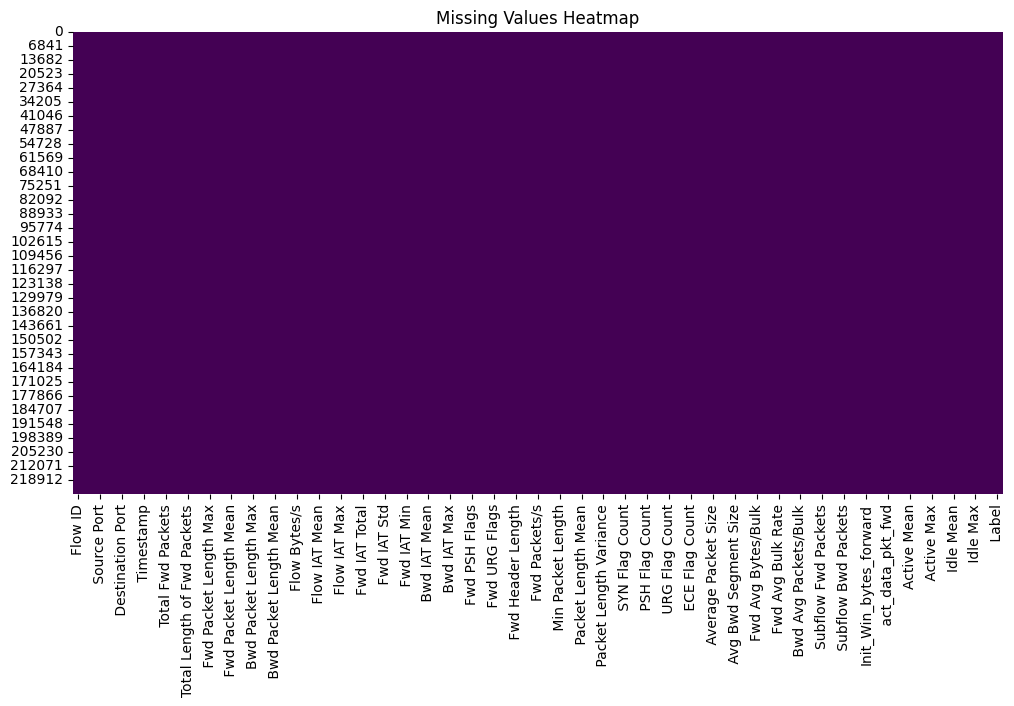

In [ ]:
# Visualize Missing Values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis") """ To visually show which values in the dataset are missing,
                              making it easy to spot patterns or columns/rows with NaNs. """

plt.title("Missing Values Heatmap")
plt.show()


**Checking Duplicates :** Checking duplicates ensures your dataset is accurate, clean, and reliable, which is crucial for correct statistics and effective machine learning.

In [ ]:
# Check duplicates
df.duplicated().sum()


np.int64(2)

**Drop Dupliactes :** Dropping duplicates makes your dataset smaller, cleaner, unbiased, and reliable, which is crucial for building a trustworthy DDOS detection model.

In [ ]:
# If duplicates exist → drop them
df = df.drop_duplicates()


**Irrelevant Features :** To remove columns that don’t contribute to the analysis or model, reducing noise, improving performance, and making the dataset cleaner and easier to interpret.

In [ ]:
# Drop irrelevant features
print("Column names before dropping:", df.columns.tolist())
df = df.drop(["Flow ID"," Source IP"," Destination IP"], axis=1)   """ This step is part of feature selection to keep
                                                   only the relevant columns for building a DDOS detection model. """
print("Column names after dropping:", df.columns.tolist())

Column names before dropping: ['Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length

**Saving the Cleaned Data**

In [ ]:
# Save Cleaned Data
df.to_csv("/content/drive/MyDrive/AI Sentinet Project/Cleaned_Friday.csv", index=False)


**Correlation HeatMap :** visualize the correlation between features in your dataset

The correlation heatmap visualizes the relationships between the important numerical features. The color intensity indicates the strength and direction of the correlation: **warmer colors (reds)** show positive correlations, **cooler colors (blues)** show negative correlations, and colors closer to white indicate weak or no correlation. This helps identify features that are highly related to each other, which can be useful for feature selection or understanding feature interactions.

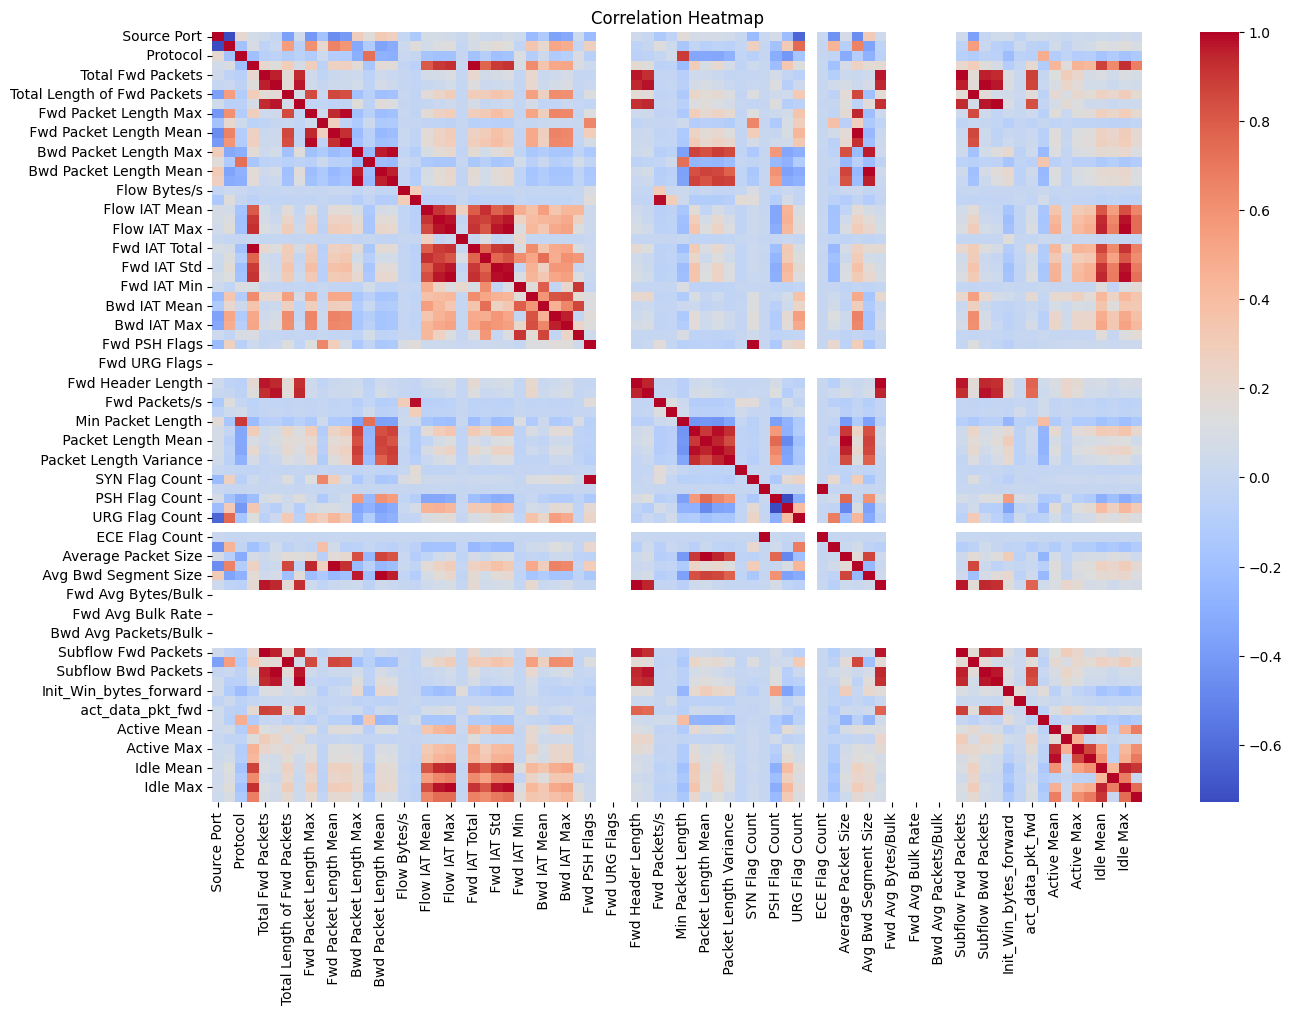

In [ ]:
# Check Correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.drop([' Timestamp', ' Label'], axis=1).corr(), cmap="coolwarm", annot=False)  """ Drops columns that are not
                                                                 numeric or not needed for correlation calculation """
plt.title("Correlation Heatmap")
plt.show()

**Detecting Outliers in Flow Duration :**

Outliers in Flow Duration may indicate anomalous or attack traffic. Helps decide if you need to remove extreme values or treat them differently before model training.

**With BoxPlot :** Boxplots help quickly spot unusual or extreme values in a feature, which is essential for cleaning data, understanding patterns, and building reliable models

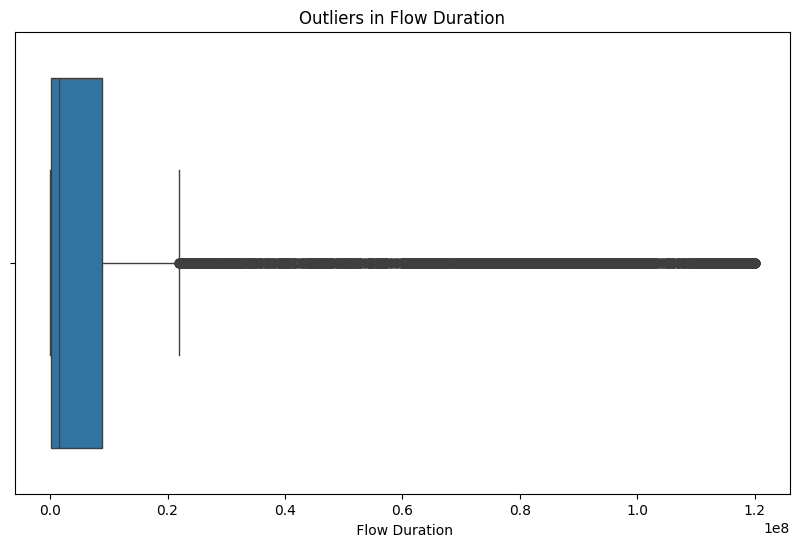

In [ ]:
# check for outliers with boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x=df[' Flow Duration'])  # Visualizes the distribution of a feature and highlights outliers
plt.title("Outliers in Flow Duration")
plt.show()

**Without BoxPlot using Statistical Method (IQR rule) :** The IQR rule allows us to programmatically and precisely detect outliers, which is crucial for cleaning large datasets, making accurate statistics, and preparing data for ML models.

In [ ]:
# check for outliers without boxplot using Statistical method (IQR rule)
Q1 = df[' Flow Duration'].quantile(0.25)
Q3 = df[' Flow Duration'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df[' Flow Duration'] < Q1 - 1.5*IQR) | (df[' Flow Duration'] > Q3 + 1.5*IQR)]  """ This line identifies all rows in the dataset where
                                                      Flow Duration is unusually low or high (outliers) based on the IQR rule,
                                                      helping to detect extreme values that may affect analysis or model performance. """
print("Number of outliers:", len(outliers))


Number of outliers: 37465


**Feature Selection and Data Cleaning: Encoding, Variance Threshold, and Handling Infinite/NaN Values**

In [ ]:
# Identify Important & Non-Important Features
# But for EDA, check correlation + variance,Low variance columns (almost same values everywhere) → not useful
from sklearn.feature_selection import VarianceThreshold
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Remove leading spaces from column names
df.columns = df.columns.str.lstrip()

# Apply Encoding on Categorical Features (Label)
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values that were introduced by replacing infinite values
df.dropna(inplace=True)

# Drop the 'Timestamp' column as it is not a numerical feature
df = df.drop(["Timestamp"], axis=1)

# Check for infinite values in the DataFrame
print("Checking for infinite values after replacement:")
print(df.isin([np.inf, -np.inf]).sum())


selector = VarianceThreshold(threshold=0.01)
# Exclude non-numeric columns before applying VarianceThreshold
numerical_df = df.select_dtypes(include=np.number)
selector.fit(numerical_df.drop(["Label"], axis=1))

print("\nVariance Threshold applied successfully.")

Checking for infinite values after replacement:
Source Port          0
Destination Port     0
Protocol             0
Flow Duration        0
Total Fwd Packets    0
                    ..
Idle Mean            0
Idle Std             0
Idle Max             0
Idle Min             0
Label                0
Length: 81, dtype: int64

Variance Threshold applied successfully.


**Checking Infinite Values in Dataframe :**

This code checks the dataset for any infinite values (np.inf or -np.inf) in each column, which can cause errors or incorrect results during analysis or model training.

In [ ]:
import numpy as np

# Check for infinite values in the DataFrame
print("Checking for infinite values:")
print(df.isin([np.inf, -np.inf]).sum())  # Counts infinite values in each column to identify data that needs cleaning.

Checking for infinite values:
Source Port          0
Destination Port     0
Protocol             0
Flow Duration        0
Total Fwd Packets    0
                    ..
Idle Mean            0
Idle Std             0
Idle Max             0
Idle Min             0
Label                0
Length: 81, dtype: int64


**Identifying Categorical and Numerical Features :**

To separate the dataset’s features into categorical (string/object) and numerical (int/float) columns, which helps in choosing appropriate preprocessing steps for each type of feature.



*   **Categorical** → may need encoding before ML.
*   **Numerical** → can be used directly for statistics, scaling, or modeling.



In [ ]:
# Identify Categorical & Numerical Features
categorical = df.select_dtypes(include=['object']).columns
numerical = df.select_dtypes(include=['int64','float64']).columns

print("Categorical:", categorical)  # contains strings values
print("Numerical:", numerical)  # contains int and float values


Categorical: Index([], dtype='object')
Numerical: Index(['Source Port', 'Destination Port', 'Protocol', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet

**Encoding Categorical Features for Machine Learning :**

Converts categorical text values (here, the Label column) into numeric form because machine learning models can only process numbers, not strings. This prepares the data for model training.

In [ ]:
# Apply Encoding on Categorical Features
# Machine Learning models only understand numbers, not text
from sklearn.preprocessing import LabelEncoder

# Remove leading spaces from column names
df.columns = df.columns.str.lstrip()

le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])  # Converts the Label column from text to numbers for machine learning.

**Data Distribution Visualization**

To clean the dataset by removing irrelevant features, encoding labels, handling infinite/NaN values, converting columns to numeric, and then visualize the distribution of numerical features using histograms for exploratory data analysis (EDA).

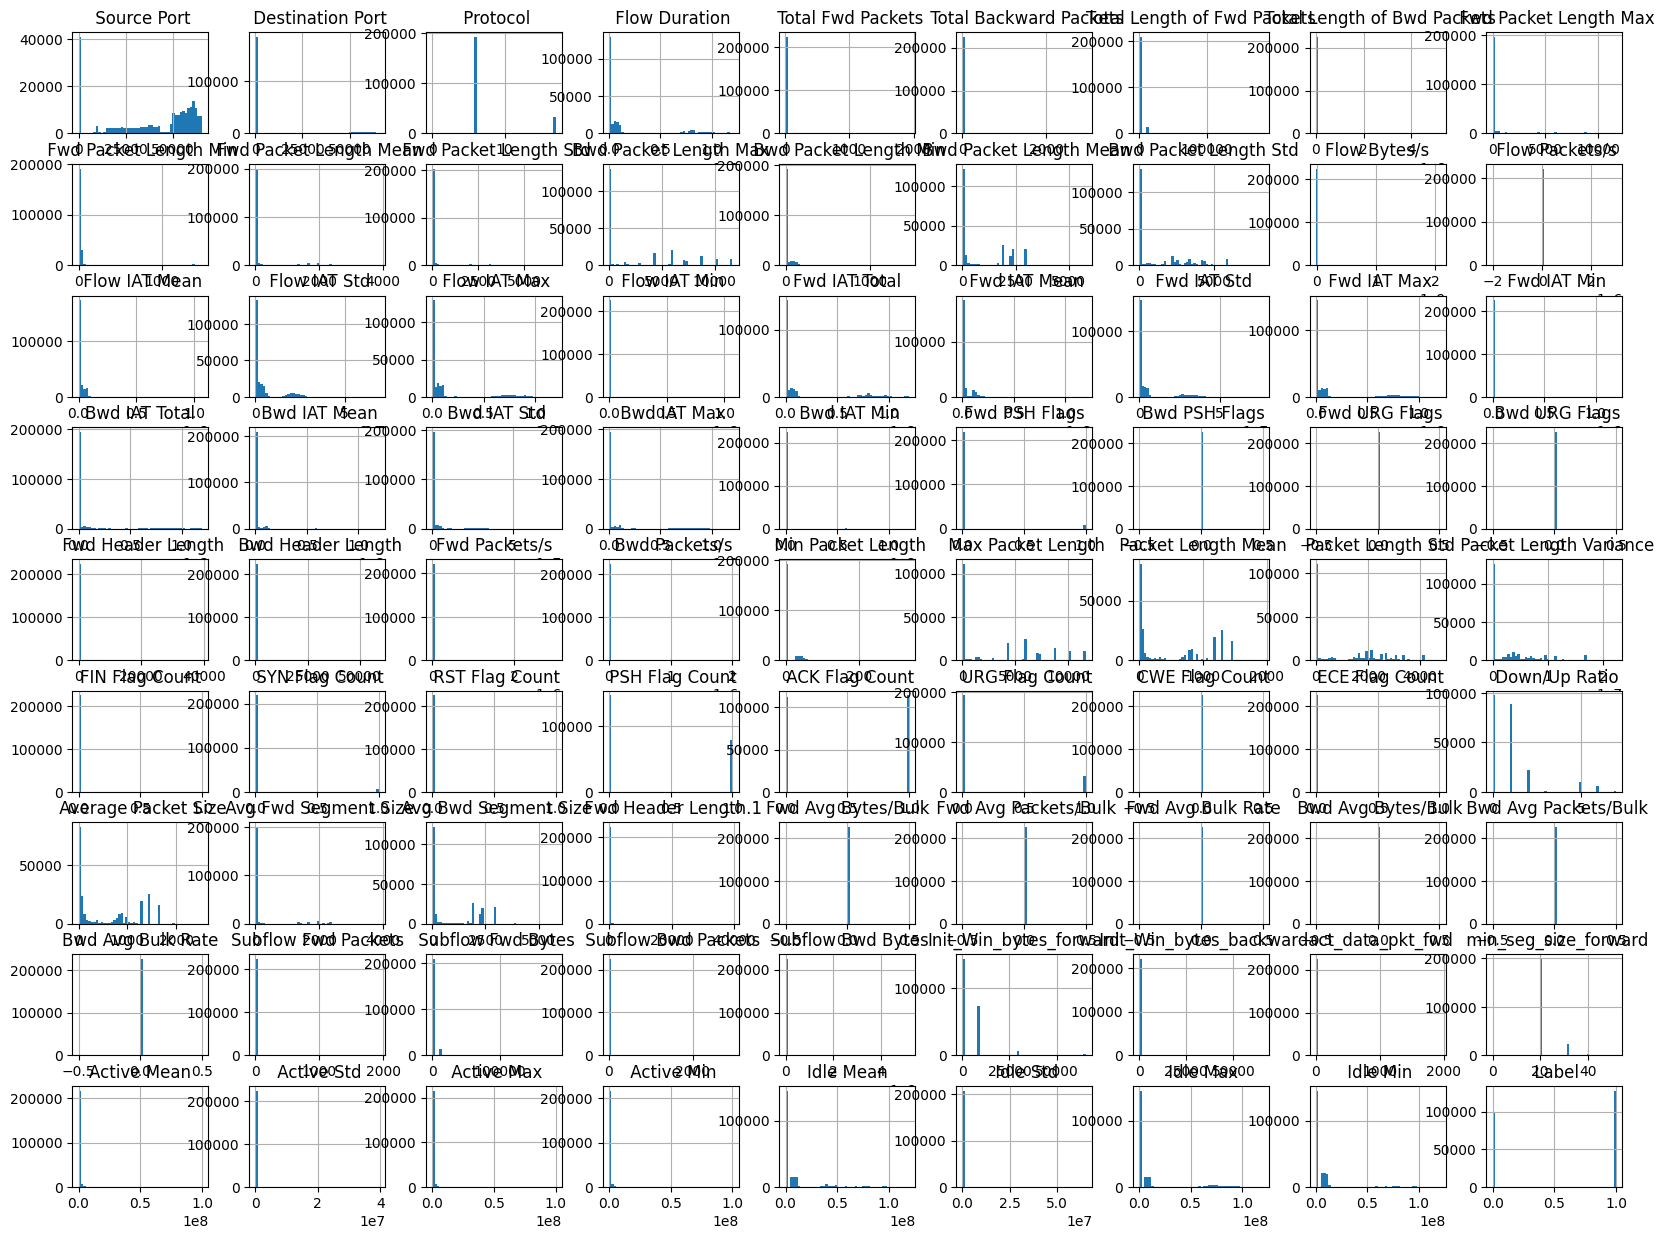

In [ ]:
# Data Distribution Visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the original dataset
file_path = "/content/drive/MyDrive/AI Sentinet Project/GeneratedLabelledFlows/TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
df = pd.read_csv(file_path, low_memory=False)

# Drop irrelevant features (Flow ID, Source IP, Destination IP - as done in cell eMYyU-ULBNZX)
df = df.drop(["Flow ID"," Source IP"," Destination IP"], axis=1)

# Apply Encoding on Categorical Features (Label - as done in cell w1awEFMPOklx)
le = LabelEncoder()
df[' Label'] = le.fit_transform(df[' Label'])

# Replace infinite values with NaN (as done in cell 9ecb0613)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop irrelevant features (Timestamp - as attempted in this cell)
df = df.drop([" Timestamp"], axis=1)

# Convert potential numerical columns to numeric, coercing errors (as attempted in this cell)
for col in df.columns:
    # Exclude 'Label' as it's already encoded
    if col != ' Label':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN values created by coercion in numerical columns (as attempted in this cell)
df.dropna(inplace=True)

# Select only numerical columns for plotting histograms
numerical_df = df.select_dtypes(include=[np.number])

# Plot histograms
numerical_df.hist(figsize=(20,15), bins=50)
plt.show()

**Save the Encoded Data**

In [ ]:
df.to_csv("/content/drive/MyDrive/AI Sentinet Project/Encoded_Friday.csv", index=False)


In [ ]:
# Select Relevant Features
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "/content/drive/MyDrive/AI Sentinet Project/GeneratedLabelledFlows/TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
df = pd.read_csv(file_path, low_memory=False)

# Drop irrelevant features (Flow ID, Source IP, Destination IP)
df = df.drop(["Flow ID"," Source IP"," Destination IP"], axis=1)

# Remove leading spaces from column names and apply encoding to 'Label'
df.columns = df.columns.str.lstrip()
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

# Replace infinite values with NaN and drop rows with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Drop the 'Timestamp' column
df = df.drop(["Timestamp"], axis=1)

# Convert potential numerical columns to numeric, coercing errors
for col in df.columns:
    if col != 'Label':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN values created by coercion in numerical columns
df.dropna(inplace=True)

important_features = [
    'Flow Duration',
    'Total Fwd Packets',
    'Total Backward Packets',
    'Total Length of Fwd Packets',
    'Total Length of Bwd Packets',
    'Flow Bytes/s',
    'Flow Packets/s',
    'Fwd Packet Length Mean',  # Corrected column name
    'Bwd Packet Length Mean',  # Corrected column name
    'Flow IAT Mean',
    'Fwd IAT Mean',
    'Bwd IAT Mean',
    'Label'
]
df_subset = df[important_features]

**Histogram and KDE Plots for Numerical Feature Distributions**

The graphs tell you how each numerical feature is distributed, show potential outliers, skewness, and variance, and help in preparing the data for machine learning.

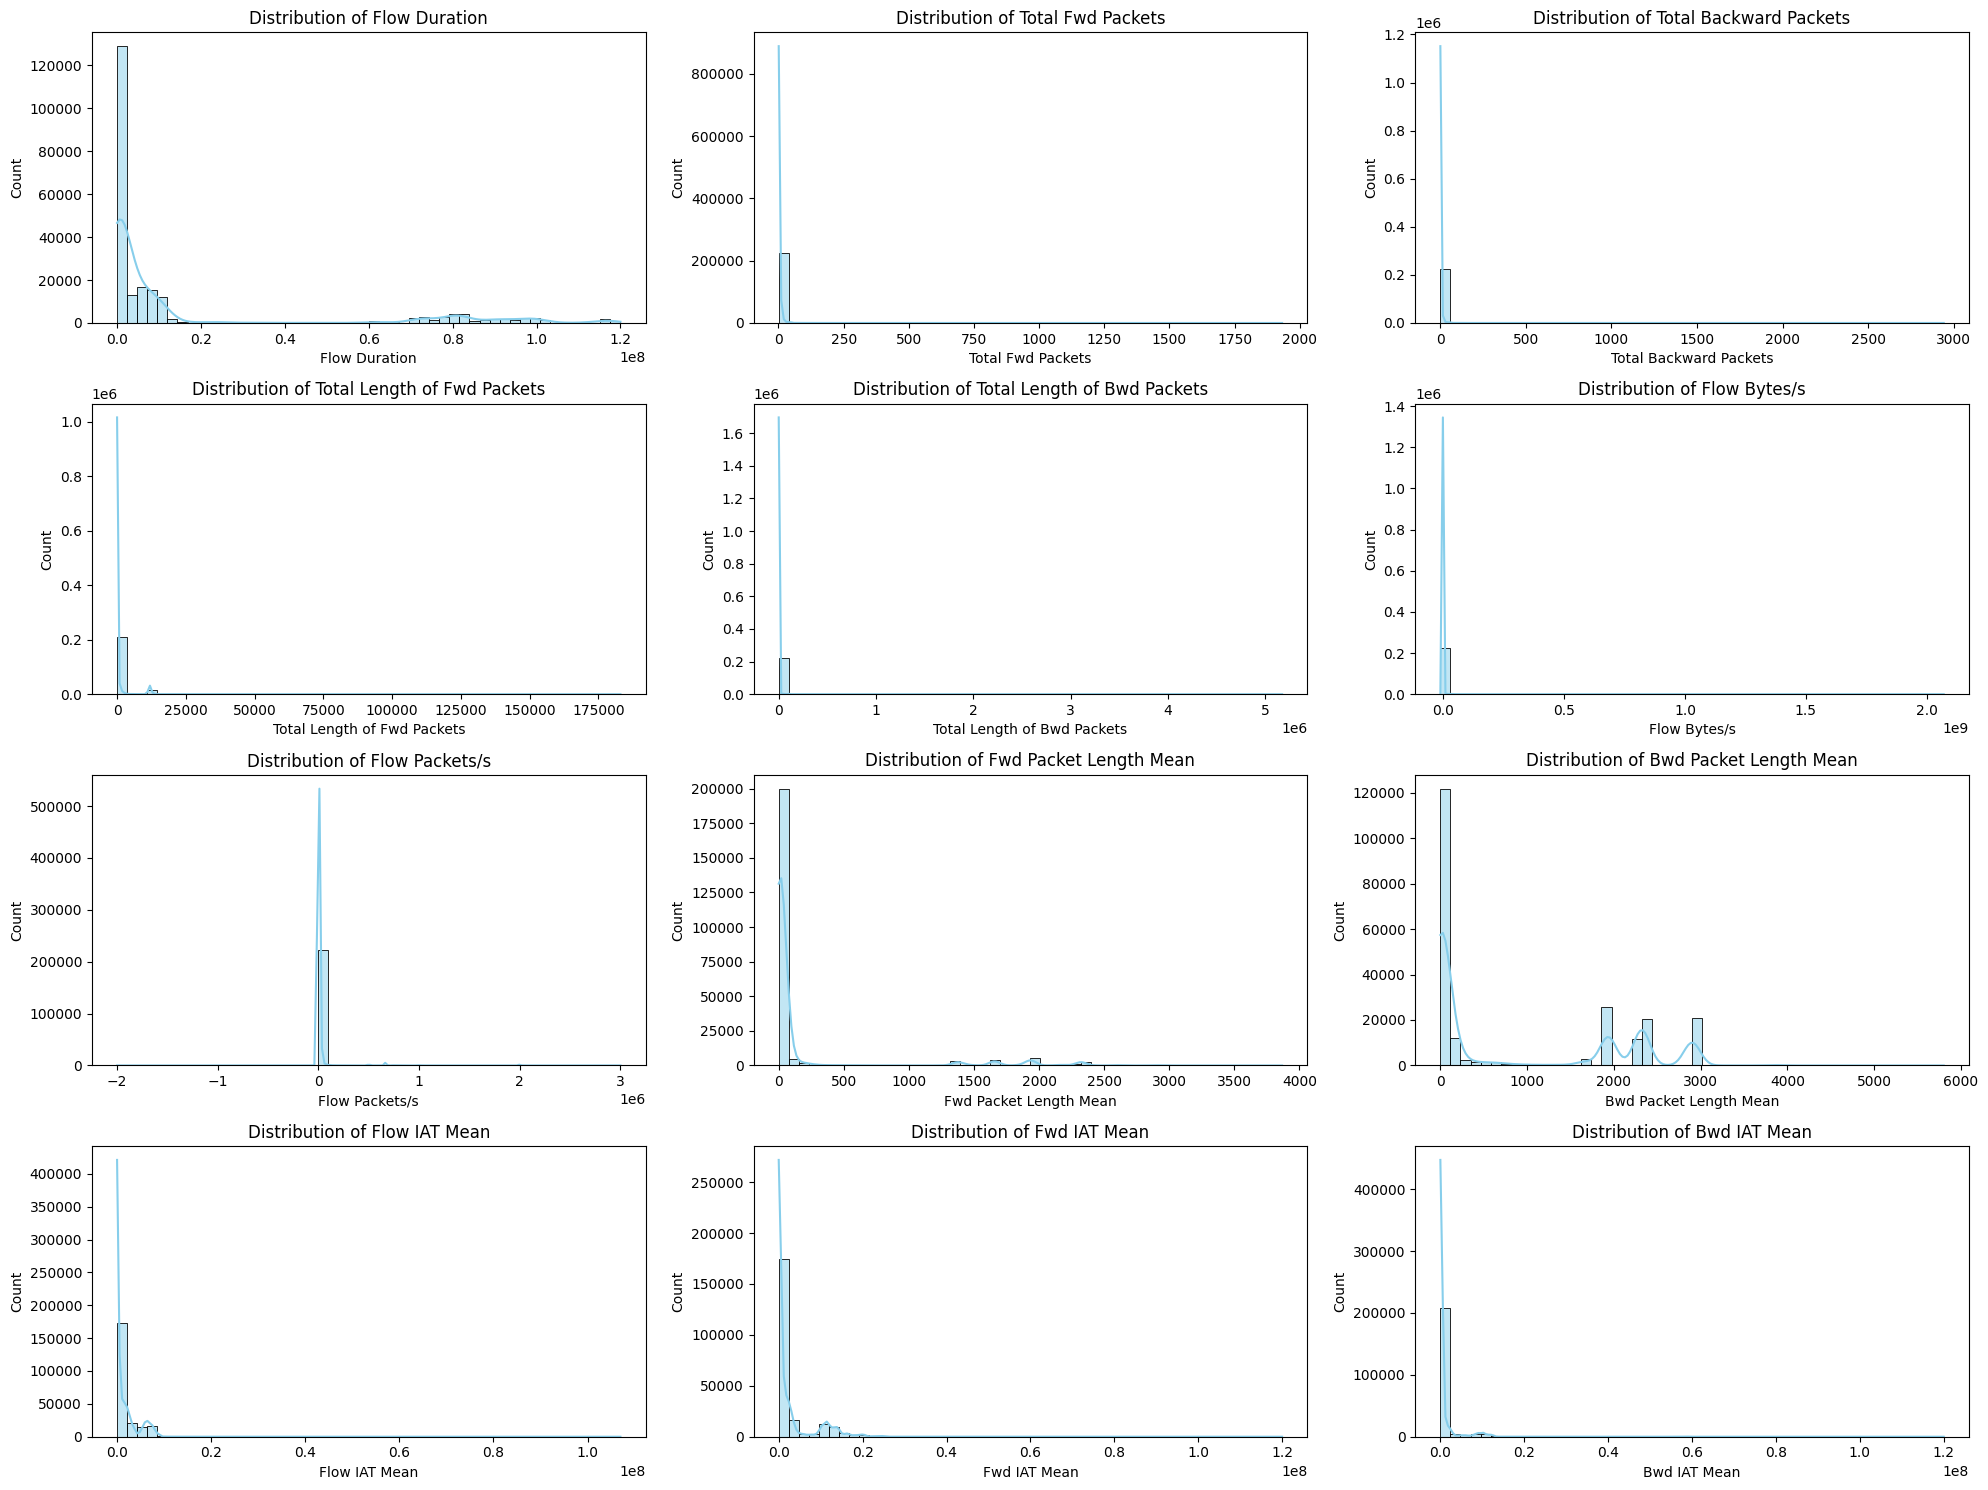

In [ ]:
# Histogram + KDE (Distribution Shape)
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = df_subset.drop('Label', axis=1).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df_subset[col], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


**Boxplots for Numerical Features to Detect Outliers**

The boxplots show the median, spread, and range of numerical features, and highlight outliers that may need special handling before machine learning

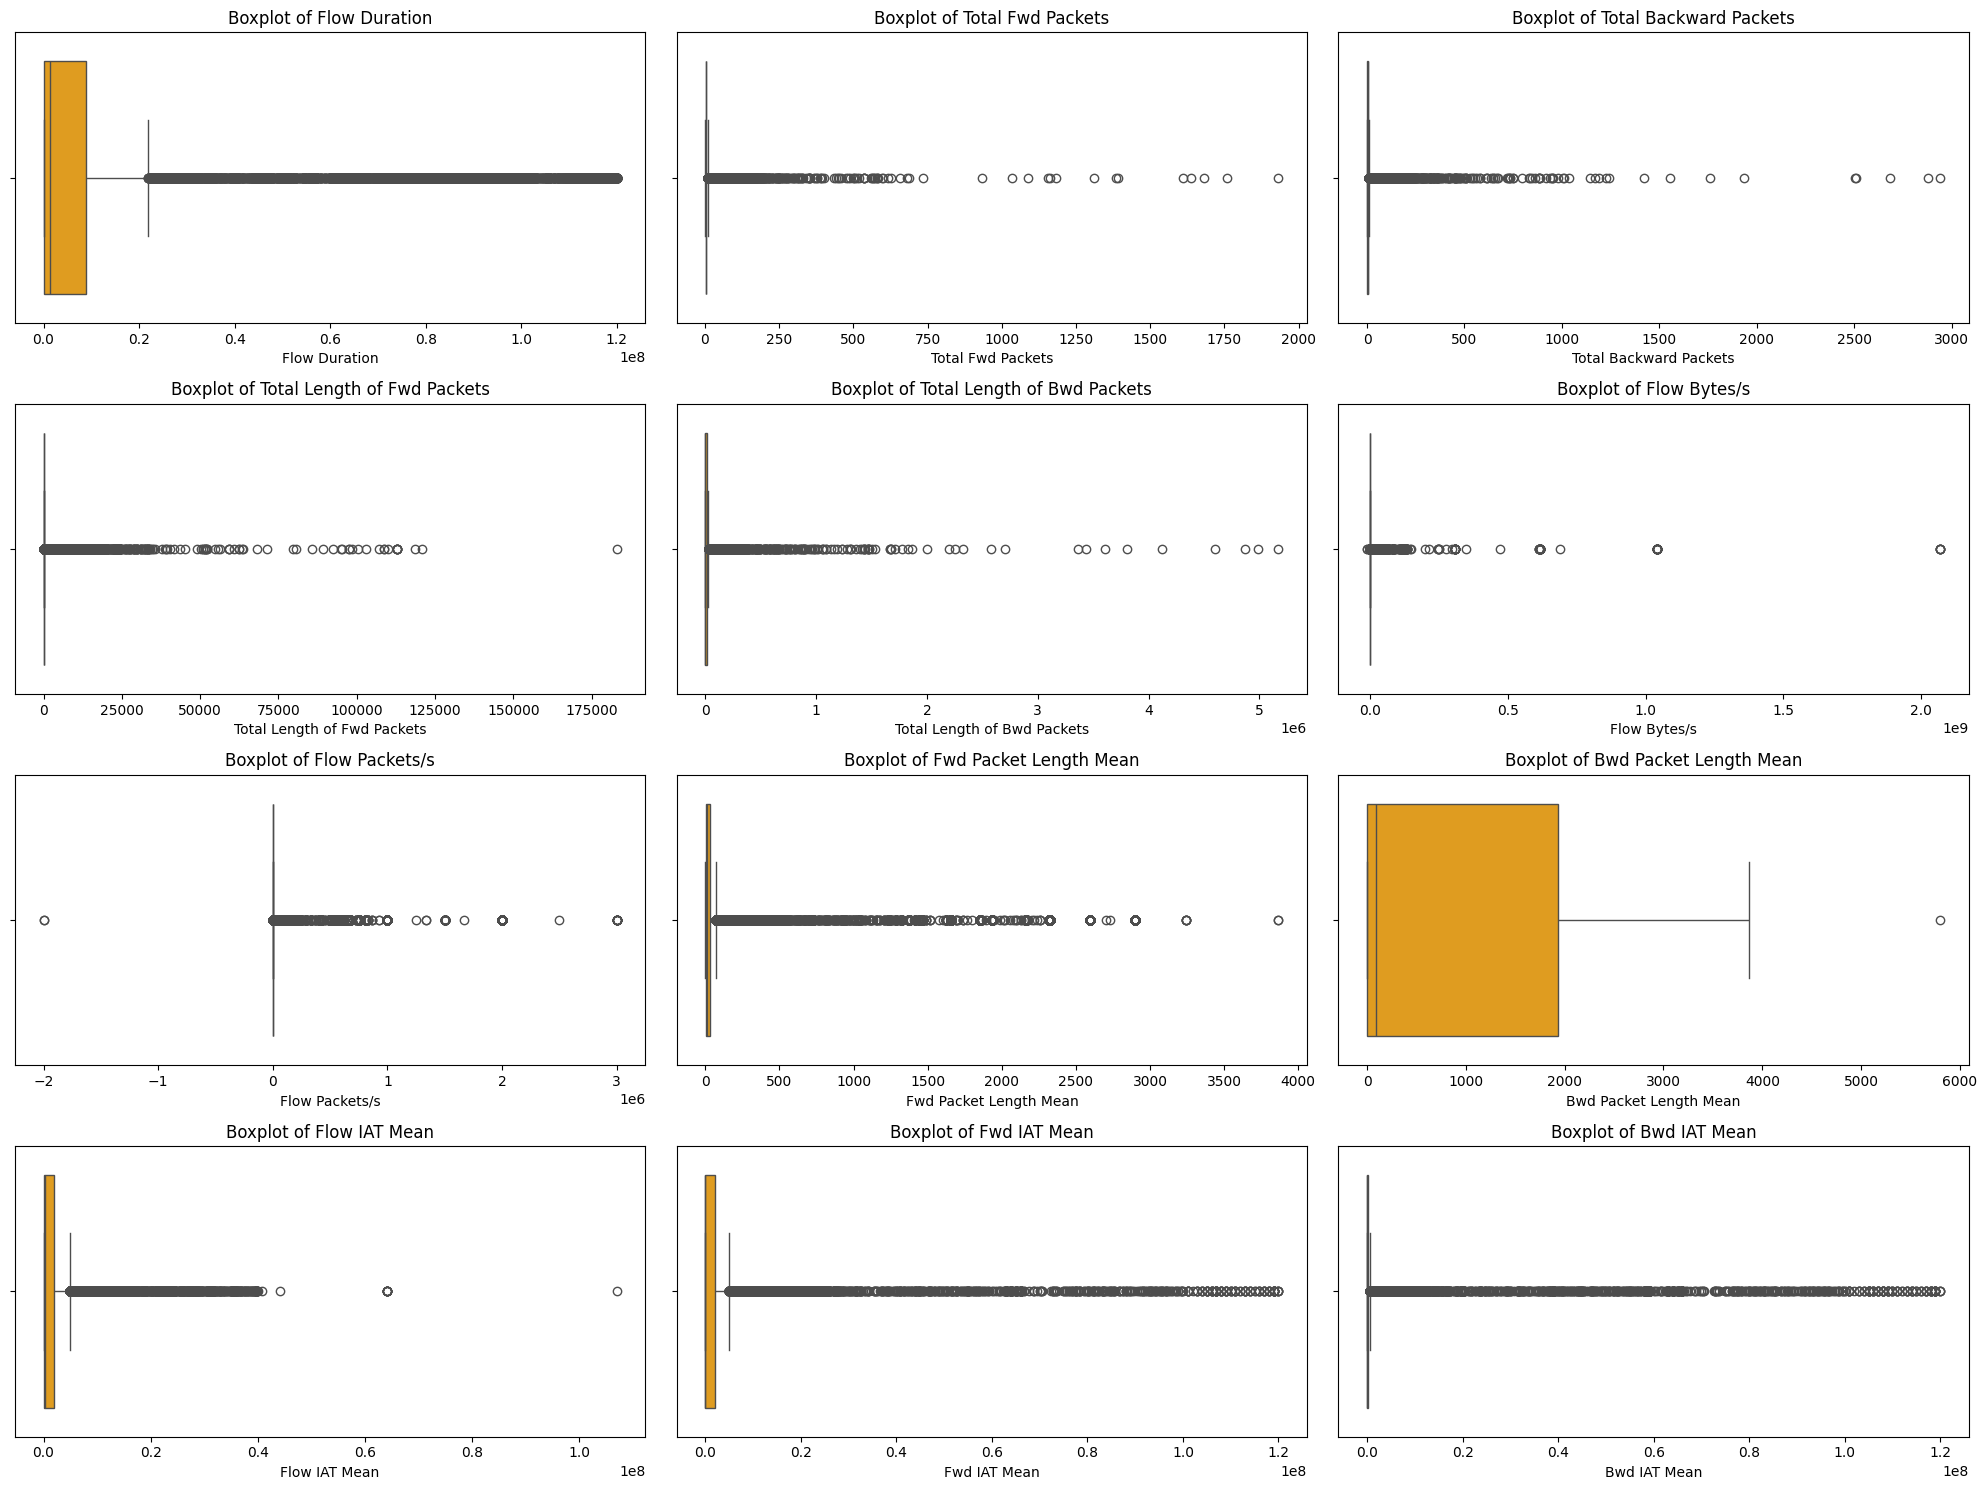

In [ ]:
# Boxplots (Outlier Visualization)
plt.figure(figsize=(20,15))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(4,3,i)
    sns.boxplot(x=df_subset[col], color='orange')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


**Kernel Density Estimation (KDE) Plots of Numerical Features by Label**

The KDE plots show how numerical features differ between classes, helping identify which features are most useful for distinguishing normal and attack traffic in the DDOS dataset

The **"Compare Distributions by Class"** KDE plots show how the values of each numerical feature are distributed for the **'BENIGN'** and **'DDoS'** labels. By comparing the shapes of the curves for each label, you can see which features have different distributions between normal and attack traffic. Features with noticeably different distributions are likely more useful for distinguishing between the two classes in your model.

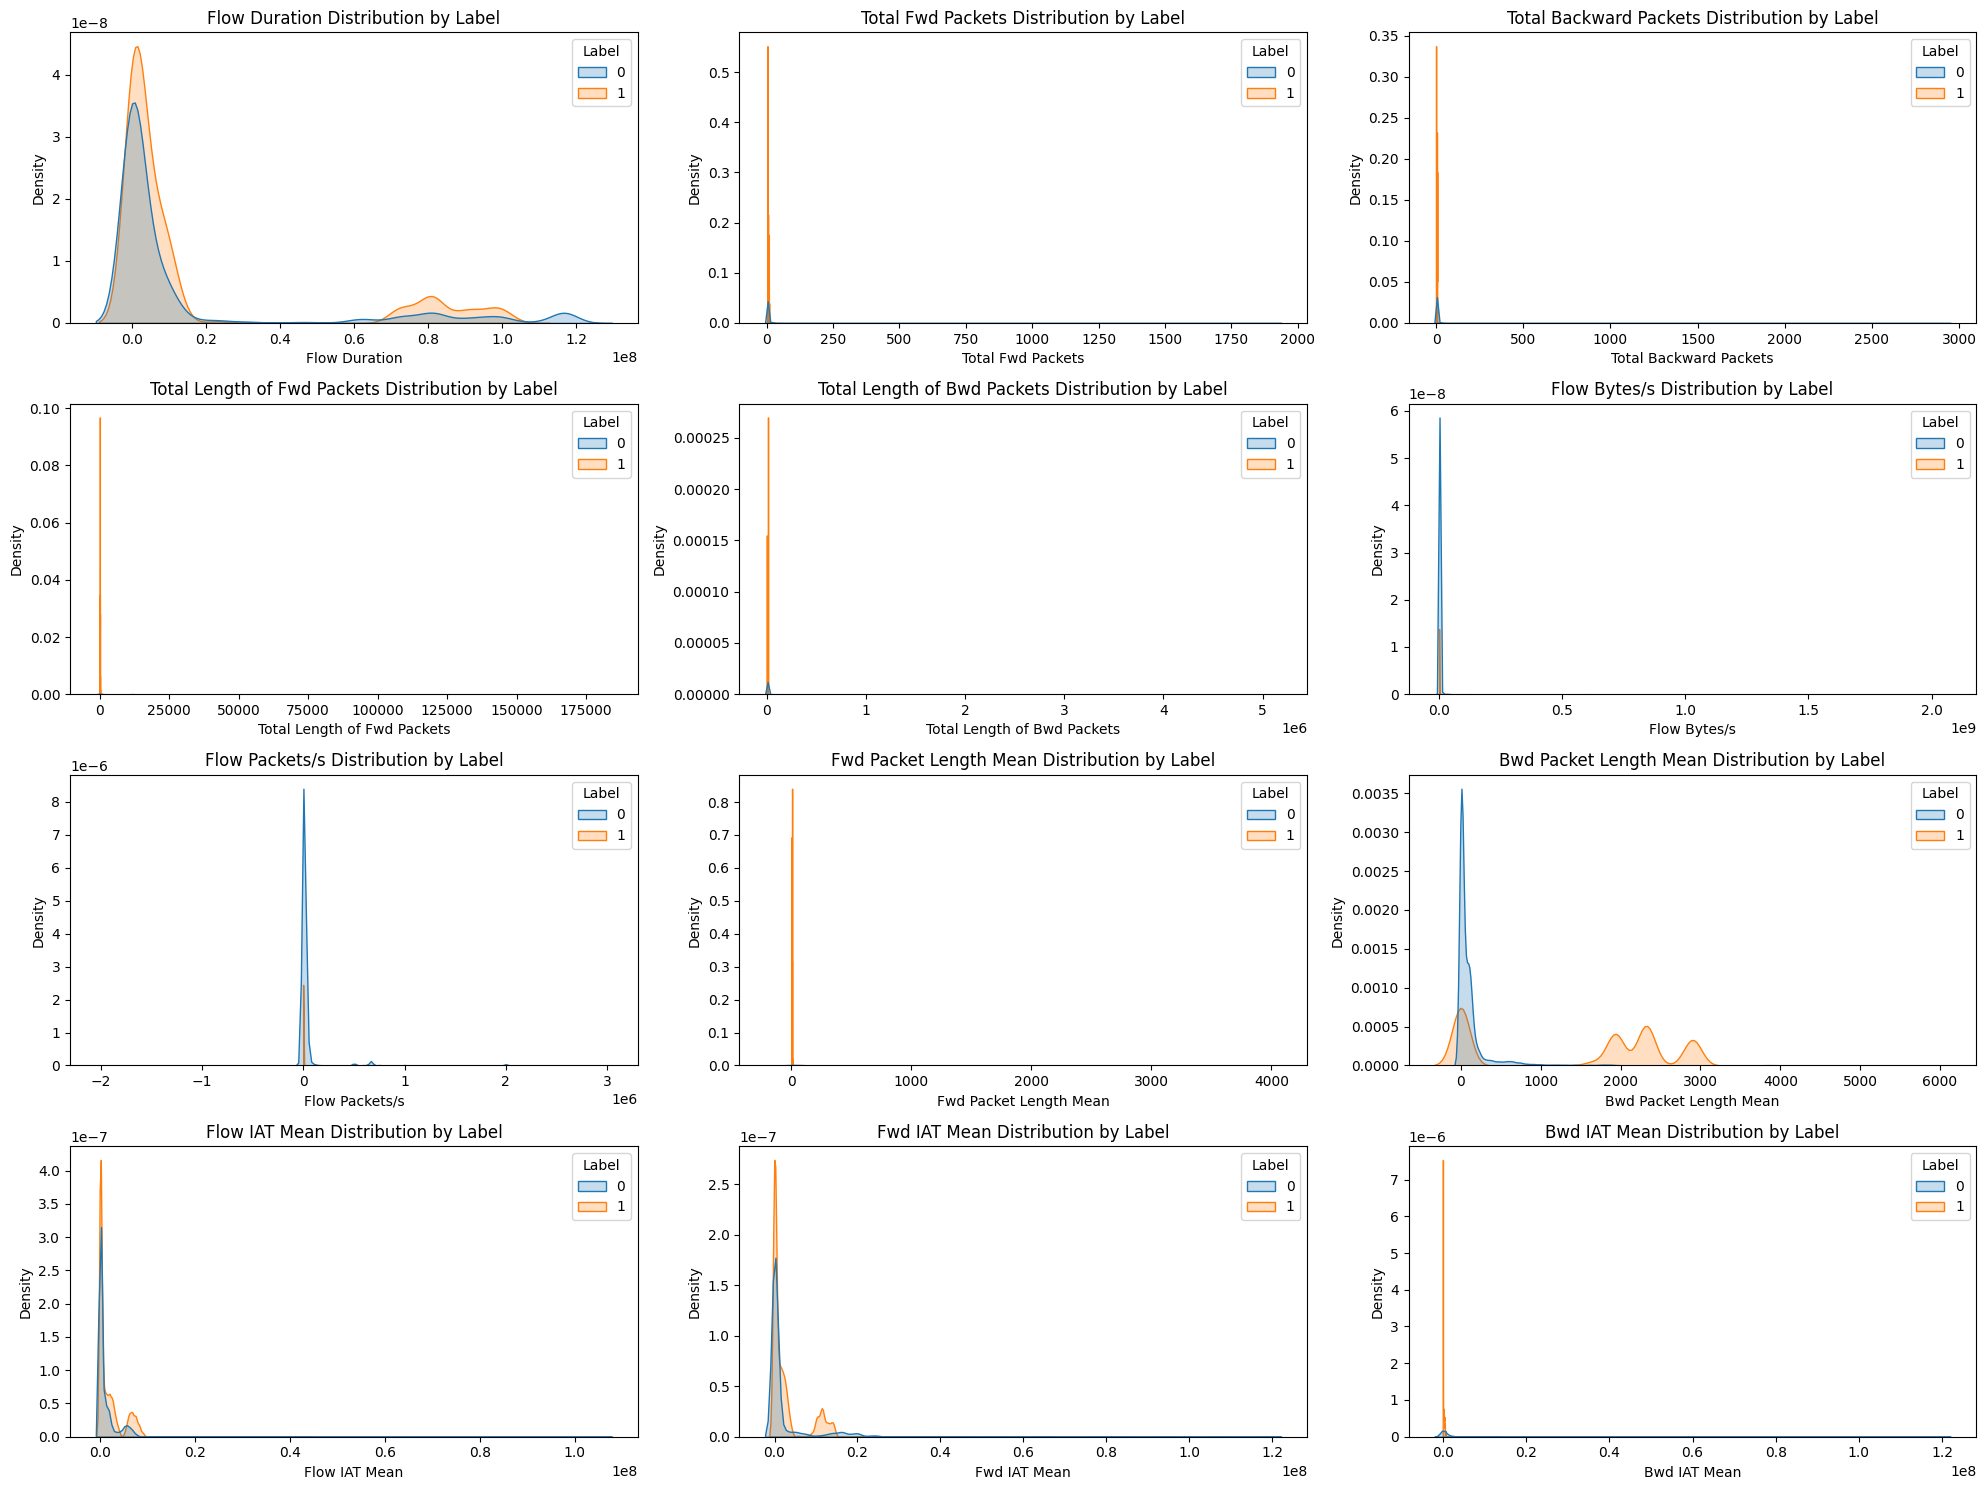

In [ ]:
# Compare Distributions by Class (BENIGN vs DDoS)
plt.figure(figsize=(20,15))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(4,3,i)
    sns.kdeplot(data=df_subset, x=col, hue='Label', fill=True)
    plt.title(f'{col} Distribution by Label')
plt.tight_layout()
plt.show()


**Correlation Heatmap (Feature Interaction Strength)**

The correlation heatmap visualizes the relationships between the important numerical features. The color intensity indicates the strength and direction of the correlation: **warmer colors (reds)** show positive correlations, **cooler colors (blues)** show negative correlations, and colors closer to white indicate weak or no correlation. This helps identify features that are highly related to each other, which can be useful for feature selection or understanding feature interactions.

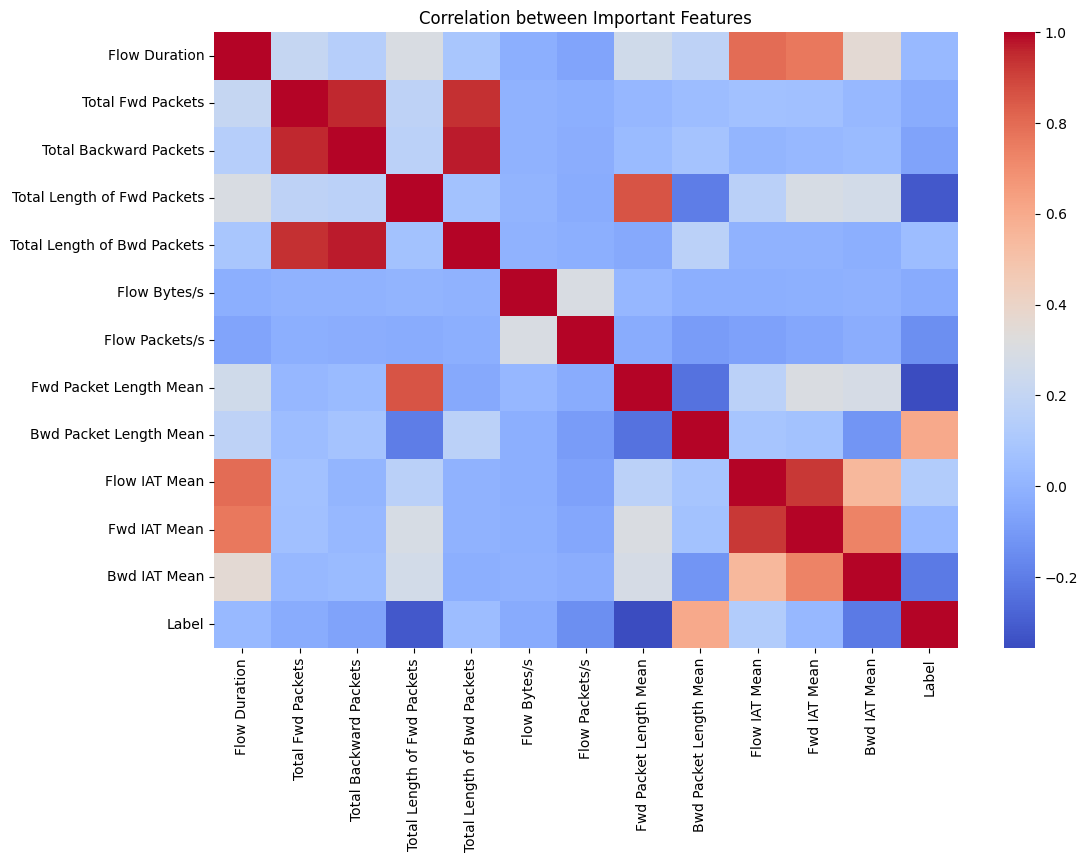

In [ ]:
# Correlation Heatmap (Feature Interaction Strength)
plt.figure(figsize=(12,8))
corr = df_subset.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation between Important Features")
plt.show()
